In [123]:
import collections
from collections import OrderedDict as odict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [124]:
terror = pd.read_csv('C:/Users/poyra/Desktop/2019 Spring/Cs 210/master/data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
#terror.describe()
#terror.shape


MemoryError: 

In [160]:

nperps_temporary = terror['nperps']

nkills_temporary = terror['nkill']

MemoryError: 

In [161]:
nperps_real = list () #The total number of terrorists participating in the incident
nkills_real = list () #The number of total confirmed fatalities for the incident
                        #perpetrators(kötülük yapan, terörist) and victims.
for i in range (181690):          
    if(nperps_temporary[i] > 0 and nkills_temporary[i] >= 0 and nperps_temporary[i] < 1000 and nkills_temporary[i] < 1000): # they can not be nan or negative number it does not make sense
        nperps_real.append(nperps_temporary[i])
        nkills_real.append(nkills_temporary[i])
                            

In [162]:
print(len(nperps_real))
print(len(nkills_real))

27270
27270


###### their length is same, no problem

In [163]:

df = pd.DataFrame(columns=['X', 'Y'])
df['X'] = nperps_real
df['Y'] = nkills_real
df.describe()

,X,Y
count,27270.000000,27270.000000
mean,14.859553,3.532453
std,49.019456,11.168726
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,6.000000,3.000000
max,800.000000,588.000000


In [183]:
#### Mean x = 14.85  ,,, Mean y = 3.5

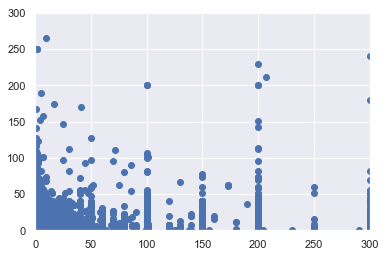

1.8457229150621557


In [172]:
from scipy import stats
x = df['X']
y = df['Y']
slope, intercept,x_value,p_value,std_err = stats.linregress(x,y)

plt.scatter(x,y)

plt.axis([0,300,0,300])
plt.plot()
plt.show()


#Prediction
newX = 15.2
newY = newX*slope*intercept

print(newY)

### Given prediction x=15.2 that expected people to be killed is y = 4.2

In [173]:
x = np.array(nperps_real).reshape((-1, 1))
y = np.array(nkills_real)
print(x)

[[ 7.]
 [ 3.]
 [ 1.]
 ...
 [ 1.]
 [12.]
 [ 3.]]


In [174]:
print(y)

[0. 0. 0. ... 0. 0. 8.]


## Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

This is how x and y look now: 

### As you can see, x has two dimensions, and x.shape is (n, 1), while y has a single dimension, and y.shape is (n,).

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
model = LinearRegression()

In [177]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [178]:
print('intercept:', model.intercept_)

intercept: 2.913036894496058


In [179]:
print('slope:', model.coef_)

slope: [0.04168472]


In [180]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[3.20482996 3.03809107 2.95472162 ... 2.95472162 3.41325358 3.03809107]


In [181]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[3.20482996]
 [3.03809107]
 [2.95472162]
 ...
 [2.95472162]
 [3.41325358]
 [3.03809107]]


In [182]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.03347215001648096


## Since R^2 analysis's result is very close to 0 there is not any corelation between 

### The total number of terrorists participating in the incident and The number of total confirmed fatalities for the incident